# Getting a channel profile

Last updated by Simon M Mudd on 12/12/2022

You just want to get a channel profile! 

This takes you through downloading the data and selecting a channel. 

You can either select a basin or a starting point. This shows you both ways to do it. 

## If you are on colab

**If you are in the `docker_lsdtt_pytools` docker container, you do not need to do any of this. 
The following is for executing this code in the google colab environment only.**

If you are in the docker container you can skip to the **First get data** section. 

First we install `lsdviztools`. 

Note that if we install `condacolab` first the `lsdviztools` installation fails. 

In [ ]:
!pip install lsdviztools

Now we need to install lsdtopotools. We do this using something called `condacolab`. 

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

Now use mamba to install `lsdtopotools`. This will install the command line tools. This step takes a bit over a minute. 

In [ ]:
!mamba install lsdtopotools &> /dev/null

In [ ]:
!lsdtt-basic-metrics

## First get data

We need to get some data to download. 

We are going to get some data from the centre of Lesotho, in some small catchements draining to the Orange River. 

We are going to download data using the opentopography scraper that is included with `lsdviztools`. You will need to get an opentopography.org account and copy in your API key. 

You can sign up to an opentopography.org account here: https://portal.opentopography.org/myopentopo 

In [ ]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio

# YOU NEED TO PUT YOUR API KEY IN A FILE
your_OT_api_key_file = "my_OT_api_key.txt"

with open(your_OT_api_key_file, 'r') as file:
    print("I am reading you OT API key from the file "+your_OT_api_key_file)
    api_key = file.read().rstrip()
    print("Your api key starts with: "+api_key[0:4])

Dataset_prefix = "Lesotho"
source_name = "COP30"

Xian_DEM = bmt.ot_scraper(source = source_name,
                        lower_left_coordinates = [-29.986795303183285, 28.210294055430822], 
                        upper_right_coordinates = [-29.546820300795922, 28.636351905601636],
                        prefix = Dataset_prefix, 
                        api_key_file = your_OT_api_key_file)
Xian_DEM.print_parameters()
Xian_DEM.download_pythonic()
DataDirectory = "./"
Fname = Dataset_prefix+"_"+source_name+".tif"
gio.convert4lsdtt(DataDirectory,Fname)

Let's check to see what the filenames we generated are:

In [ ]:
!ls Lesotho*

We have a little script to plot the basemap. The `-bmrem` flag controls how wide the map is compared to the DEM time.

In [ ]:
!lsdtt_plotbasicrasters -dir ./ -fname Lesotho_COP30_UTM -BM true -bmrem 20

The data goes into a directory called `basemap_plots`. We can see the image by using the `display` function.

In [ ]:
!ls basemap_plots

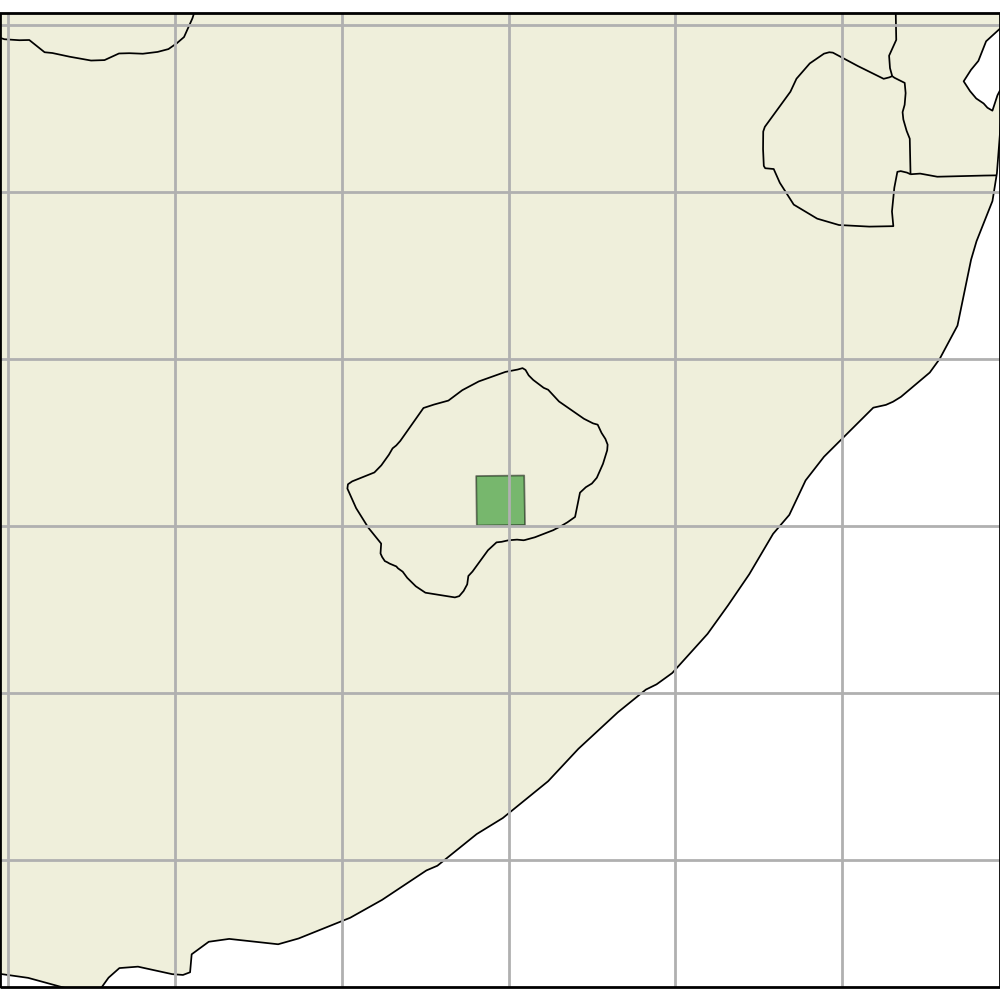

In [1]:
from IPython.display import display, Image
display(Image(filename="./basemap_plots/Lesotho_COP30_UTM_basemap.png", width=800))

## Look at the hillshade

Right, lets see what this place looks like:

In [4]:
import lsdviztools.lsdmapwrappers as lsdmw

In [5]:
lsdtt_parameters = {"write_hillshade" : "true"}

Dataset_prefix = "Lesotho"
source_name = "COP30"

r_prefix = Dataset_prefix+"_"+source_name +"_UTM"
w_prefix = Dataset_prefix+"_"+source_name +"_UTM"
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = r_prefix,
                                 write_prefix= w_prefix,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling', 'lsdtt-valley-metrics']
Testing has been done against lsdtopotools v0.7
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: Lesotho_COP30_UTM
The write prefix is: Lesotho_COP30_UTM
The parameter dictionary is:
{'write_hillshade': 'true'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.
|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
|| http://doi.org/10.5281/zenodo.4577879               

Your colourbar will be located: right
xsize: 1394 and y size: 1643
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32735
EPSG:32735
The EPSGString is: EPSG:32735
minimum values are x: 616748.0 and y: 6681529.0
I made the ticks.
x labels are: 
['625', '634', '643', '652']
x locations are:
[625000.0, 634000.0, 643000.0, 652000.0]
y labels are: 
['6690', '6699', '6708', '6717', '6726']
y locations are:
[6690000.0, 6699000.0, 6708000.0, 6717000.0, 6726000.0]
This colourmap is: gray


/LSDTopoTools/python_packages/lsdviztools/lsdviztools/lsdmapfigure/plottingraster.py:453: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.tick_x_labels)
/LSDTopoTools/python_packages/lsdviztools/lsdviztools/lsdmapfigure/plottingraster.py:454: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.tick_y_labels)


The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1394 and y size: 1643
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32735
EPSG:32735
The EPSGString is: EPSG:32735
I am going to use the normalisation None
I am using the full range of values in the raster.
The number of axes are: 2
The aspect ratio is: 0.8484479610468655
I need to adjust the spacing of the colourbar.
You have a colourbar on the left or right, I need to check the number of characters in the labels.
['1000', '2000', '3000', '4000']
The longest colourbar label has 4 characters.
I'm adjusting the colourbar text width to 0.55 inches
The cbar characters are: 4 and the cbar text width is: 0.55
cbar_left: 5.3 map left: 0.8500000000000001
cbar_bottom: 0.65 map bottom: 0.65
The figure size is: 
[6.25, 5.977008608321378]
Map axes are:
[0.136, 0.10875005250871644, 0.696, 0.8577883928732168]
cbar_axes are:
[0.848, 0.10875005250871644, 0.032, 0.8577883928732168]
Number of axes are: 2
I'm return

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.


<Figure size 640x480 with 0 Axes>

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.


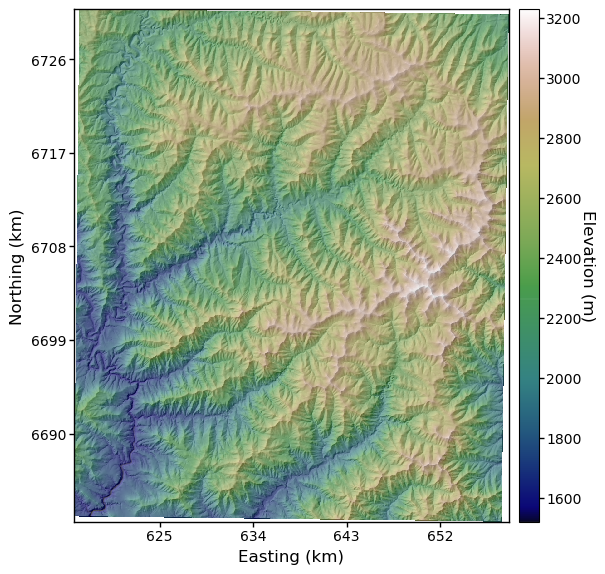

In [6]:
%matplotlib inline
Base_file = r_prefix
DataDirectory = "./"
this_img = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth", save_fig=False, size_format="geomorphology",dpi=500)

## Get a channel by basin

Lets get a channel by basin. I will make a pandas dataframe with the outlet location (I get this from google maps, just right click where you want it and copy the lat-long) and then create a csv file. 

In [ ]:
# Import pandas library
import pandas as pd

data = [ [-29.777917730941095, 28.291853180393723]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['latitude', 'longitude'])

df.to_csv("basin_outlets.csv",index=False)
df.head()

From this outlet we will extract the basin and also get a channel profile. 
There are various options but the one that includes channel profile alongside drainage area and the chi coordinate (see https://onlinelibrary.wiley.com/doi/abs/10.1002/esp.3302) is `print_chi_data_maps`:

**WARNING** This will not accept basins that touch the edge of the DEM. So you need to put your point a bit upstream of a tributary junction if it joins with a bigger basin that drains to the edge. 

In [ ]:
## Get the basins and the channel profile
lsdtt_parameters = {"print_basin_raster" : "true",
                    "print_chi_data_maps" : "true",
                    "get_basins_from_outlets" : "true",
                    "basin_outlet_csv" : "basin_outlets.csv"}
r_prefix = Dataset_prefix+"_"+source_name +"_UTM"
w_prefix = Dataset_prefix+"_"+source_name +"_UTM"
lsdtt_drive = lsdmw.lsdtt_driver(command_line_tool = "lsdtt-chi-mapping", 
                                 read_prefix = r_prefix,
                                 write_prefix= w_prefix,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

Okay, lets have a look at the basin we got:

In [ ]:
%%capture             
Base_file = r_prefix
basins_img = lsdmw.PrintBasins_Complex(DataDirectory,Base_file,cmap="gist_earth", 
                             size_format="geomorphology",dpi=600, save_fig = True)

In [ ]:
print(basins_img)
from IPython.display import display, Image
display(Image(filename=basins_img, width=800))

Okay, now the channel profile is in a csv file:

In [ ]:
!ls Lesotho*csv

## Plot channels

We can plot the channels using the command line script from `lsdviztools`:

In [ ]:
!lsdtt_plotbasicrasters -dir ./ -fname Lesotho_COP30_UTM -PCh true

This puts the plot in a subdirectory called `raster_plots`:

In [ ]:
!ls raster_plots

In [ ]:
from IPython.display import display, Image
display(Image(filename="raster_plots/Lesotho_COP30_UTM_ChElevation_chi_channels_and_basins.png", width=800))

We can also do that natively here:

In [ ]:
%matplotlib inline
this_curv_img = lsdmw.PrintChannelsAndBasins(DataDirectory,Base_file,
                                       add_basin_labels = True, cmap = "jet", 
                                       size_format = "ESURF", fig_format = "png", 
                                       dpi = 300, save_fig = False)

Or we could load the data as a pandas dataframe and plot the profile:

In [ ]:
df = pd.read_csv("Lesotho_COP30_UTM_chi_data_map.csv")
df.head()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.flow_distance,df.elevation)

In [ ]:
plt.scatter(df.chi,df.elevation)

## What if I don't want a basin but instead want to select a source?

In some cases your channel is cut off by the edge of the DEM but you still want a profile. The basin selection tools look to calculate drainage area and this will be incorrect in an incomplete basin. But you can select a channel by source, allowing you to just get elevation downstream. We need to tell `lsdtopotools` where the source point is, and we do that with a csv file:

In [7]:
# Import pandas library
import pandas as pd

data = [ [-29.574418486660242, 28.262105221820292]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['latitude', 'longitude'])

df.to_csv("channel_source.csv",index=False)
df.head()

,latitude,longitude
0,-29.574418,28.262105


In [8]:
lsdtt_parameters = {"extract_single_channel" : "true", 
                    "channel_source_fname" : "channel_source.csv"}

Dataset_prefix = "Lesotho"
source_name = "COP30"

r_prefix = Dataset_prefix+"_"+source_name +"_UTM"
w_prefix = Dataset_prefix+"_"+source_name +"_UTM"
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = r_prefix,
                                 write_prefix= w_prefix,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling', 'lsdtt-valley-metrics']
Testing has been done against lsdtopotools v0.7
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: Lesotho_COP30_UTM
The write prefix is: Lesotho_COP30_UTM
The parameter dictionary is:
{'extract_single_channel': 'true', 'channel_source_fname': 'channel_source.csv'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.
|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
||

The file from this goes into something called `single_channel_nodes.csv`. We can load it into a pandas dataframe and have a look at it.

In [10]:
df = pd.read_csv("single_channel_nodes.csv")
df.head()

,id,row,column,latitude,longitude,x,y,flow distance(m),drainage area (m^2),elevation(m)
0,130865,103,183,-29.574340,28.262156,622253.312,6727715,72038.3,4500.0,2060.02
1,130866,103,184,-29.574337,28.262466,622283.312,6727715,72008.3,5400.0,2048.09
2,130867,103,185,-29.574334,28.262776,622313.312,6727715,71978.3,121880000.0,2042.85
3,132243,104,185,-29.574605,28.262779,622313.312,6727685,71948.3,121921000.0,2042.84
4,133618,105,184,-29.574879,28.262473,622283.312,6727655,71905.9,121980000.0,2042.40


To plot columns from a data frame you need to know the column headers. Sometimes these have white space. So if you use the `list` function you can get the exact headers in order to plot the data. 

In [15]:
list(df)

['id',
 'row',
 'column',
 'latitude',
 'longitude',
 'x',
 'y',
 ' flow distance(m)',
 ' drainage area (m^2)',
 ' elevation(m)']

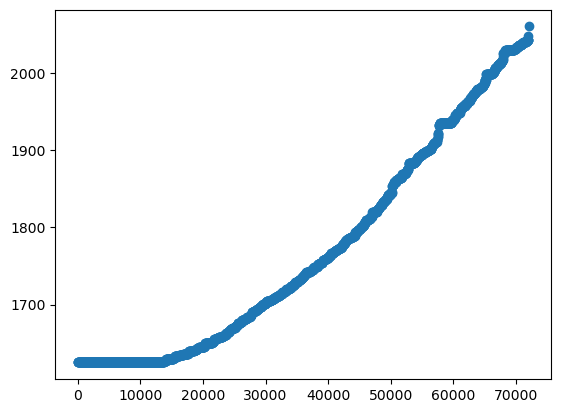

In [16]:
import matplotlib.pyplot as plt
#plt.scatter(df["flow distance(m)"],df["elevation(m)"])
plt.scatter(df[" flow distance(m)"],df[" elevation(m)"])